<a href="https://colab.research.google.com/github/shubhambagalsrb/Data-Science/blob/main/MMMx_simple_end_to_end_demo_pydataglobal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MMM are statistical models which help in quantifying the impact of several marketing inputs on sales.


![image.png](https://rb.gy/ogh98p)

marketing pioneer John Wanamaker said, "Half the money I spend on advertising is wasted; the trouble is I don’t know which half."

**Roughly speaking, there are three goals.**

1. The first goal is to "understand & Measure Return on Investment (ROI)". For example, the model will tell you your ROI on TV last year.
2. The Second objective is simulation. For example, with this, you can answer a business question like "What would our sales be if more or less money were spent on TV next year? You would be able to find out what your sales would be like if more or less money were spent on TV the following year.
3. The third one is optimizing media budgets. This step will help you to optimize budget allocation, which will contribute to maximizing sales.

![image.png](https://rb.gy/qqv8bv)

## Key challenges in media optimization

You might wonder why it is so difficult to measure ROI or why not just check ROI on the report issued by each media.

These are good questions. But the reality is a little more complicated.

1. The first reason is that the end-user has multiple media touchpoints, and media channel influences are intertwined.

2. Secondly, tracking accuracy is not always correct these days. Offline media channel influence is hard to track. For example, for print media such as newspapers or magazines, we can’t track how many people actually see the ads in that form of media. What is worse, even in the digital world, privacy regulations such as GDPR and Apple’s IDFA deprecation have been impacting tracking accuracy.

3. Thirdly, randomized experiments, known as a Lift test, are impractical. The gold standard for answering a causal question is to perform a randomized experiment by randomly splitting a population into a test group and a control group where the test group has no advertisements. However, this is not practical because companies prefer not to restrict ads for a long time, as this could lead to lost opportunities.

![image.png](https://shorturl.at/B291w)

## Data Preparation

1. Input data: We use time-series data and do not use any privacy-related data. As you can see, we have a week, sales, media spending, and other data column.

2. What kind of data is needed?
- The first part is the most important metric, which is the KPI of your business, and this will be a dependent variable. If you are a retailer or a manufacturer, sales is a common choice. However, if you are a mobile app company, the number of apps installed would be the KPI.
- Next, explanatory variables are potential factors that impact sales.
- Media data is mandatory because we want to optimize these allocations.
- And Non-media marketing data such as price, promotion, or product distribution affects sales.
- External factors such as seasonality, holidays, weather, or macroeconomy data are also important to increase the model’s accuracy.


![image.png](https://towardsdatascience.com/wp-content/uploads/2022/12/08vZWGjEK53RpL7X8-1024x412.png)

3. How granular should the data be?

- In terms of time, MMMs often require two to three years of weekly-level data. However, if you don’t have that much data, daily data is also acceptable, but in that case, you will need to be more careful in reviewing the outliers.
- Next is business granularity. The common approach is to collect brand or business unit-level data. For example, Procter & Gamble has Pantene, Head and Shoulders, and Herbal Essence in the hair care category. And each brand team has a different sales, marketing, and media strategy. Make sure to determine the data granularity based on the product line, organization, and decision-making process.
- When looking at media spending data, a common granularity is the media channel level, such as TV, Print, OOH, and digital. But it depends on how much you are spending on each media.
- For example, if you spend a lot on digital ads, it is better to break down the digital channel into more specific groups, such as Google search ads, Google display ads, YouTube ads, Facebook ads, etc., because Google search ads and YouTube ads have different funnels and roles.



## Modeling

1. Simple traditional approach – Linear Regression
- First, let’s start by considering simple modeling. Linear regression on observational data is a common method that has traditionally been used.

![image.png](https://shorturl.at/HOybV)



Here, sales is the objective variable, and media spending factors and control factors are explanatory variables. These coefficients mean the impact on sales. So, beta_m is the coefficient of the media variables, and beta_c is the coefficient of the control variables such as seasonality or price change. The most significant advantage of this method is that everyone can run it quickly because even Excel has a regression function. Also, it’s easy for everyone, including non-tech executives, to understand the results intuitively. However, this method is not grounded in key marketing principles that are widely accepted by the marketing industry.



2. Two principles in advertising

There are two ad principles to consider: Saturation and Ad stock.

![image.png](https://shorturl.at/XERfG)

**Saturation :** The effectiveness of one media channel’s advertisements decays as the expenditure increases. Let me say that in a different way: The more money you spend on one media channel advertisement, the less effective it is. Saturation is also called the shape effect.

**Ad-Stock :** The advertising effect on sales may lag behind the initial exposure and extend several weeks because consumers generally remember ads for an extended period of time, but they sometimes delay action. There are several reasons why: Consumers don’t purchase the items immediately if they already have home stock. Or If they plan to purchase expensive items such as a PC, furniture, or a TV, they may take several days to several weeks to consider purchasing the items. These examples are what cause the carry-over effect.

3. Model proposed by Google Researchers Jin et al.

- Researchers at Google proposed a method that reflects these two features in 2017. The formula below is the final model that reflects the carryover effect and ad saturation.

![image.png](https://shorturl.at/efwR3)

The basic approach is the same as the simple model I shared earlier. Sales can be decomposed into baseline sales, media factors, control factors, and white noise. And in this formula, the coefficient beta represents the impact of each factor. The change here is to apply two transformation functions to the time series of media spending: saturation and ad stock function.



4. Useful MMM libraries (LightweightMMM vs Robyn)
- Here, let me introduce two great OSS libraries that will help you to try MMM : **LightweightMMM**, a Python-based library developed mainly by Google developers, and **Robyn**, an R-based library developed by Meta.

- **LightweitMMM uses Numpyro and JAX for Probabilistic Programming, which makes the modeling process much faster.** On top of the standard approach, **LightweightMMM offers a hierarchical approach.** If you have state-level or regional-level data, this geo-based hierarchical approach can yield more accurate results.

- While Robyn makes use of Meta’s AI library ecosystem. **Nevergrad is used for hyperparameter optimization, And Prophet is adopted for handling time series data.**

In [3]:

# First would be to install lightweight_mmm
# If you face the error that requests to restart runtime, Click the restart runtime button and re-install it.
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-8cquc_pj
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-8cquc_pj
  Resolved https://github.com/google/lightweight_mmm.git to commit fac9eb9dc184adb22f0ad36f0134b1781d6d300a
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.8/360.8 kB 33.1 MB/s eta 0:00:00
  Created wheel for lightweight_mmm: filename=lightweight_mmm-0.1.9-py3-none-any.whl size=105532 sha256=bd0adec300eb233babef7e533f77df4d34102b1a7495bcb8853800774b3c5f95
  Stored in directory: /tmp/pip-ephem-wheel-cache-se9pxrm5/wheels/9b/74/da/1fff0c5d9bed3051ec67956f4344864734a765731166839fe5
Successfully built lightweight_mmm
  Attempting uninstall: matplotlib
    Found existing installati

In [2]:
# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro

In [3]:

# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils


## Organising the data for modelling


In [4]:
import pandas as pd

# I am not sure whether this data set is real, dummy, or simulated data, but for me, it looks more realistic than any other data I found on the internet.
df = pd.read_csv("https://raw.githubusercontent.com/sibylhe/mmm_stan/main/data.csv")

# 1. media variables
# media spending (Simplified media channel for demo)
mdsp_cols=[col for col in df.columns if 'mdsp_' in col and col !='mdsp_viddig' and col != 'mdsp_auddig' and col != 'mdsp_sem']

# 2. control variables
# holiday variables
hldy_cols = [col for col in df.columns if 'hldy_' in col]
# seasonality variables
seas_cols = [col for col in df.columns if 'seas_' in col]

control_vars =  hldy_cols + seas_cols

# 3. sales variables
sales_cols =['sales']

df_main = df[['wk_strt_dt']+sales_cols+mdsp_cols+control_vars]
df_main = df_main.rename(columns={'mdsp_dm': 'Direct Mail', 'mdsp_inst': 'Insert', 'mdsp_nsp': 'Newspaper', 'mdsp_audtr': 'Radio', 'mdsp_vidtr': 'TV', 'mdsp_so': 'Social Media', 'mdsp_on': 'Online Display'})
mdsp_cols = ["Direct Mail","Insert", "Newspaper", "Radio", "TV", "Social Media", "Online Display"]


In [5]:

df_main.head()

,wk_strt_dt,sales,Direct Mail,Insert,Newspaper,Radio,TV,Social Media,Online Display,hldy_Black Friday,...,seas_prd_12,seas_week_40,seas_week_41,seas_week_42,seas_week_43,seas_week_44,seas_week_45,seas_week_46,seas_week_47,seas_week_48
0,2014-08-03,72051457.64,678410.26,129759.66,507635.16,254134.14,216725.59,0.0,61364.75,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-08-10,78794770.54,661097.71,70355.33,625719.37,106602.98,108919.26,0.0,132643.90,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-08-17,70071185.56,1874338.43,107720.37,277532.61,59011.42,74032.19,0.0,76741.27,0,...,0,0,0,0,0,0,0,0,0,0
3,2014-08-24,68642464.59,306583.37,141708.61,186028.61,178010.46,110995.66,0.0,193043.55,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-08-31,86190784.65,2366274.16,160691.30,706694.09,144097.56,225140.84,0.0,249612.89,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
SEED = 105


In [7]:


data_size = len(df_main)

n_media_channels = len(mdsp_cols)
n_extra_features = len(control_vars)
media_data = df_main[mdsp_cols].to_numpy()
extra_features = df_main[control_vars].to_numpy()
target = df_main['sales'].to_numpy()
costs = df_main[mdsp_cols].sum().to_numpy()

We can then split the dataset into train and test. Lets leave only the last 24 weeks for testing in this case.



In [8]:
# Split and scale data.
test_data_period_size = 24
split_point = data_size - test_data_period_size
# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
# Extra features
extra_features_train = extra_features[:split_point, ...]
extra_features_test = extra_features[split_point:, ...]
# Target
target_train = target[:split_point]


Scaling is essential for many modelling problems and this one is no exception.

We provide the class CustomScaler which behaves accordingly with sklearn scalers.

In most cases you will need 3 or 4 scalers. One scaler for the media data, one for the target and one for costs. Optionally if you are adding extra features those might need an extra scaler. **It is very important that you save and "carry with you" those scalers throughout your MMM journey as LighweightMMM will allow you to re-insert these scalers at different points to ensure everything is always in the correct scale and results. If some results don't make sense, it might be a scaling problem.**

A few more details on CustomScaler usage:

This scaler can be used in two fashions for both the multiplication and division operation.

- By specifying a value to use for the scaling operation.
- By specifying an operation used at column level to calculate the value for the actual scaling operation.

Eg. if one wants to scale the dataset by multiply by 100 you can directly pass multiply_by=100. Value can also be an array of an appropriate shape by which to divide or multiply the data. But if you want to multiply by the mean value of each column, then you can pass multiply_operation=jnp.mean (or any other operation desired).

Operation parameters have the upper hand in the cases where both values and operations are passed, values will be ignored in this case.

Consult the full class documentation if you still need to know more.

In this demo we divide the data on media, extra features and the target by their mean to ensure that the result has a mean of 1. This allows the model to be agnostic to the scale of the inputs (e.g. a user can use either the number of sales or the value of sales). The costs are not used in the model directly, they are only used to inform the prior distributions on the media variables (see the model documentation here). These costs have been scaled down by multiplying by 0.15 to reflect typical ranges in MMMs.

In [9]:

media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

media_data_train = media_scaler.fit_transform(media_data_train)
extra_features_train = extra_features_scaler.fit_transform(extra_features_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

## Training the model

The currently available models are the following:

- hill_adstock
- adstock
- carryover


The next step is training. We can choose an ad stock function for the modeling from 3 options: Hill-ad stock, Ad stock, and carryover. It is generally recommended to compare all three approaches, and use the approach that works the best.

In [10]:
mmm = lightweight_mmm.LightweightMMM(model_name="hill_adstock")


Training the model will require the following mandatory parameters:

- media
- total_costs (one value per channel)
- target

We can optionally also pass the following:

- extra_features: Other variables to add to the model.
- degrees_seasonality: Number of degrees to use for seasonality. Default is 3.
- seasonality_frequency: Frequency of the time period used. Default is 52 as in 52 weeks per year.
- media_names: Names of the media channels passed.
- number_warmup: Number of warm up samples. Default is 1000.
- number_samples: Number of samples during sampling. Default is 1000.
- number_chains: Number of chains to sample. Default is 2.

In [11]:
number_warmup=1000
number_samples=1000

In [12]:

# For replicability in terms of random number generation in sampling
# reuse the same seed for different trainings.
mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    extra_features=extra_features_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    media_names = mdsp_cols,
    seed=SEED)

/usr/local/lib/python3.11/dist-packages/lightweight_mmm/lightweight_mmm.py:359: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 2000/2000 [18:30<00:00,  1.80it/s, 1023 steps of size 1.73e-03. acc. prob=0.93]


Once training is finished, you can check the summary of your trace: The important point here is to check whether r hat values for all parameters are less than 1.1. This is a checkpoint when you run Bayesian modeling.



In [13]:

mmm.print_summary()


                                         mean       std    median      5.0%     95.0%     n_eff     r_hat
             coef_extra_features[0]      0.04      0.84      0.06     -1.36      1.38    360.21      1.00
             coef_extra_features[1]      0.11      0.70      0.13     -1.04      1.19    249.28      1.00
             coef_extra_features[2]     -0.01      0.01     -0.01     -0.02     -0.00    359.11      1.01
             coef_extra_features[3]      0.00      0.00      0.00     -0.00      0.01    687.82      1.00
             coef_extra_features[4]     -0.06      0.70     -0.06     -1.21      1.10    276.91      1.00
             coef_extra_features[5]     -0.10      0.70     -0.12     -1.18      1.05    249.62      1.00
             coef_extra_features[6]     -0.01      0.00     -0.01     -0.01     -0.00   1188.45      1.00
             coef_extra_features[7]     -0.00      0.00     -0.00     -0.01      0.00    860.06      1.00
             coef_extra_features[8]     -0.02

We can visualize the posterior distributions of the media effects.

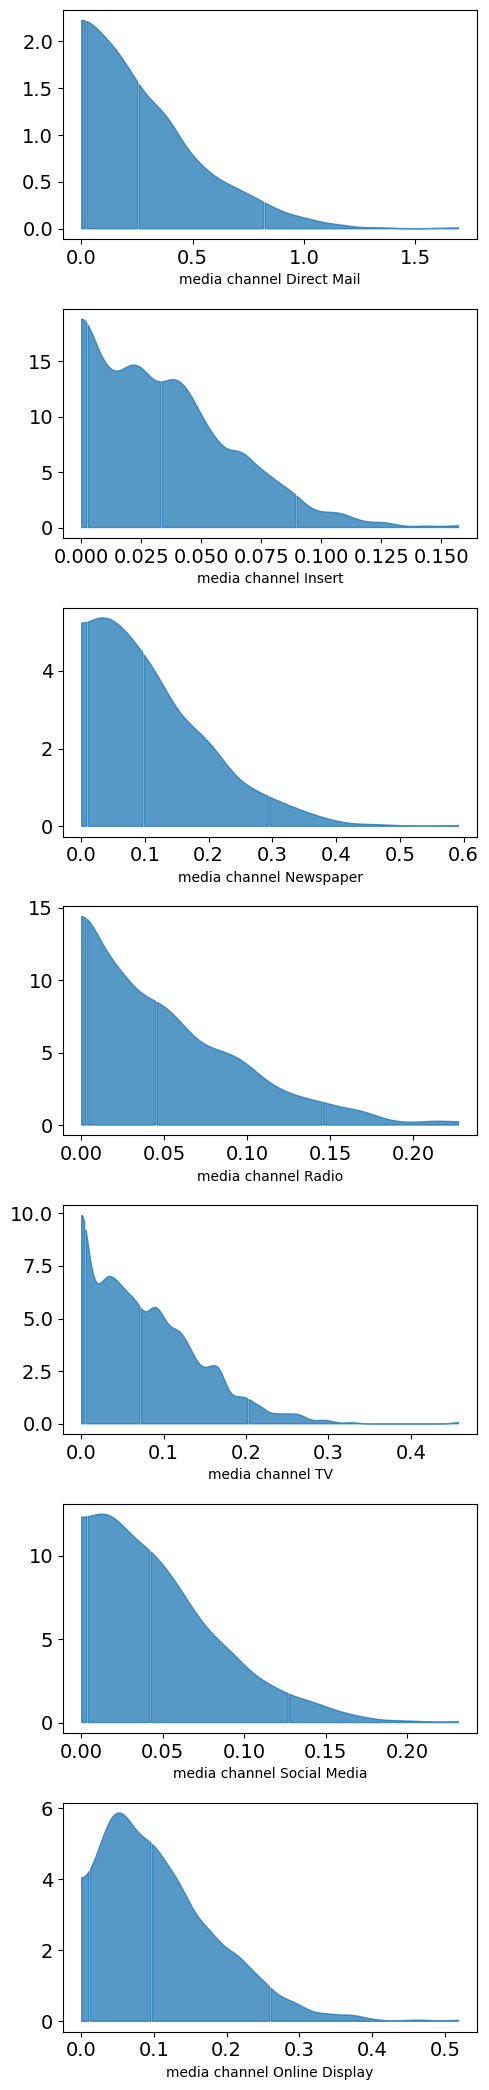

In [16]:
plot.plot_media_channel_posteriors(media_mix_model=mmm, channel_names=mdsp_cols)

[optional]

LightweightMMM also allows you to visualize the prior and posterior distributions for every model parameter at once. Note that we use a kernel density estimator to smooth these distributions for easier interpretability; you may need to adjust the bandwidth of the smoother depending on the shapes of your distributions. Also, this plot can take several minutes to run, especially if using geo-level models. Lowering the number_of_samples_for_prior or restricting to a subset of selected_features can speed up the runtime.

In [15]:
#plot.plot_prior_and_posterior(media_mix_model=mmm)


One can also check your model's fit to the training data.



Now, let’s do a fitting check. The model’s fit to the training data can also be checked by using plot_model_fit function. R-squared and MAPE, mean absolute percentage error, are shown in the chart. In this example, R2 is 0.9, and MAPE is 23%. Generally speaking, R2 is considered good if it is more than 0.8. Also, for MAPE, the goal is for it to be 20% or below.

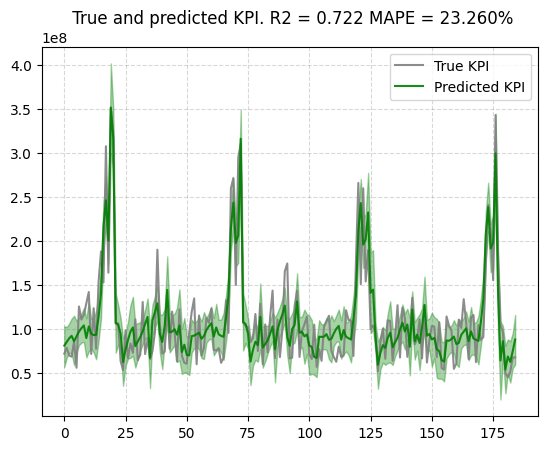

In [17]:
# Here is another example where we can pass the target scaler if you want the plot to be in the "not scaled scale"
plot.plot_model_fit(mmm, target_scaler=target_scaler)

And this is the visualization of the prediction result. R2 is 0.62, and MAPE is 23%. Honestly, the R2 and MAPE values here are not ideal. However, I do not have any additional data, and – I’m not even sure – whether this data set is real or a dummy. That said, I’m still going to be using – this data set and modeling – to show you the insights. I’ll be going over how to improve the model in more detail later.

In [18]:

# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              extra_features=extra_features_scaler.transform(extra_features_test),
                              seed=SEED)

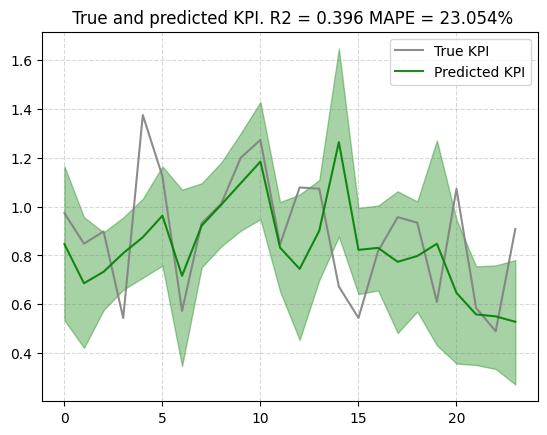

In [19]:

plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target[split_point:]))

## Media insights


We can quickly visualize the estimated media & baseline contribution over time by using this function. The graph below shows that about 70% of sales are baseline sales, which is represented by the blue area. The other colors show media contribution to the remaining sales.

In [20]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)


We can quickly visualise the estimated media & baseline contribution over time



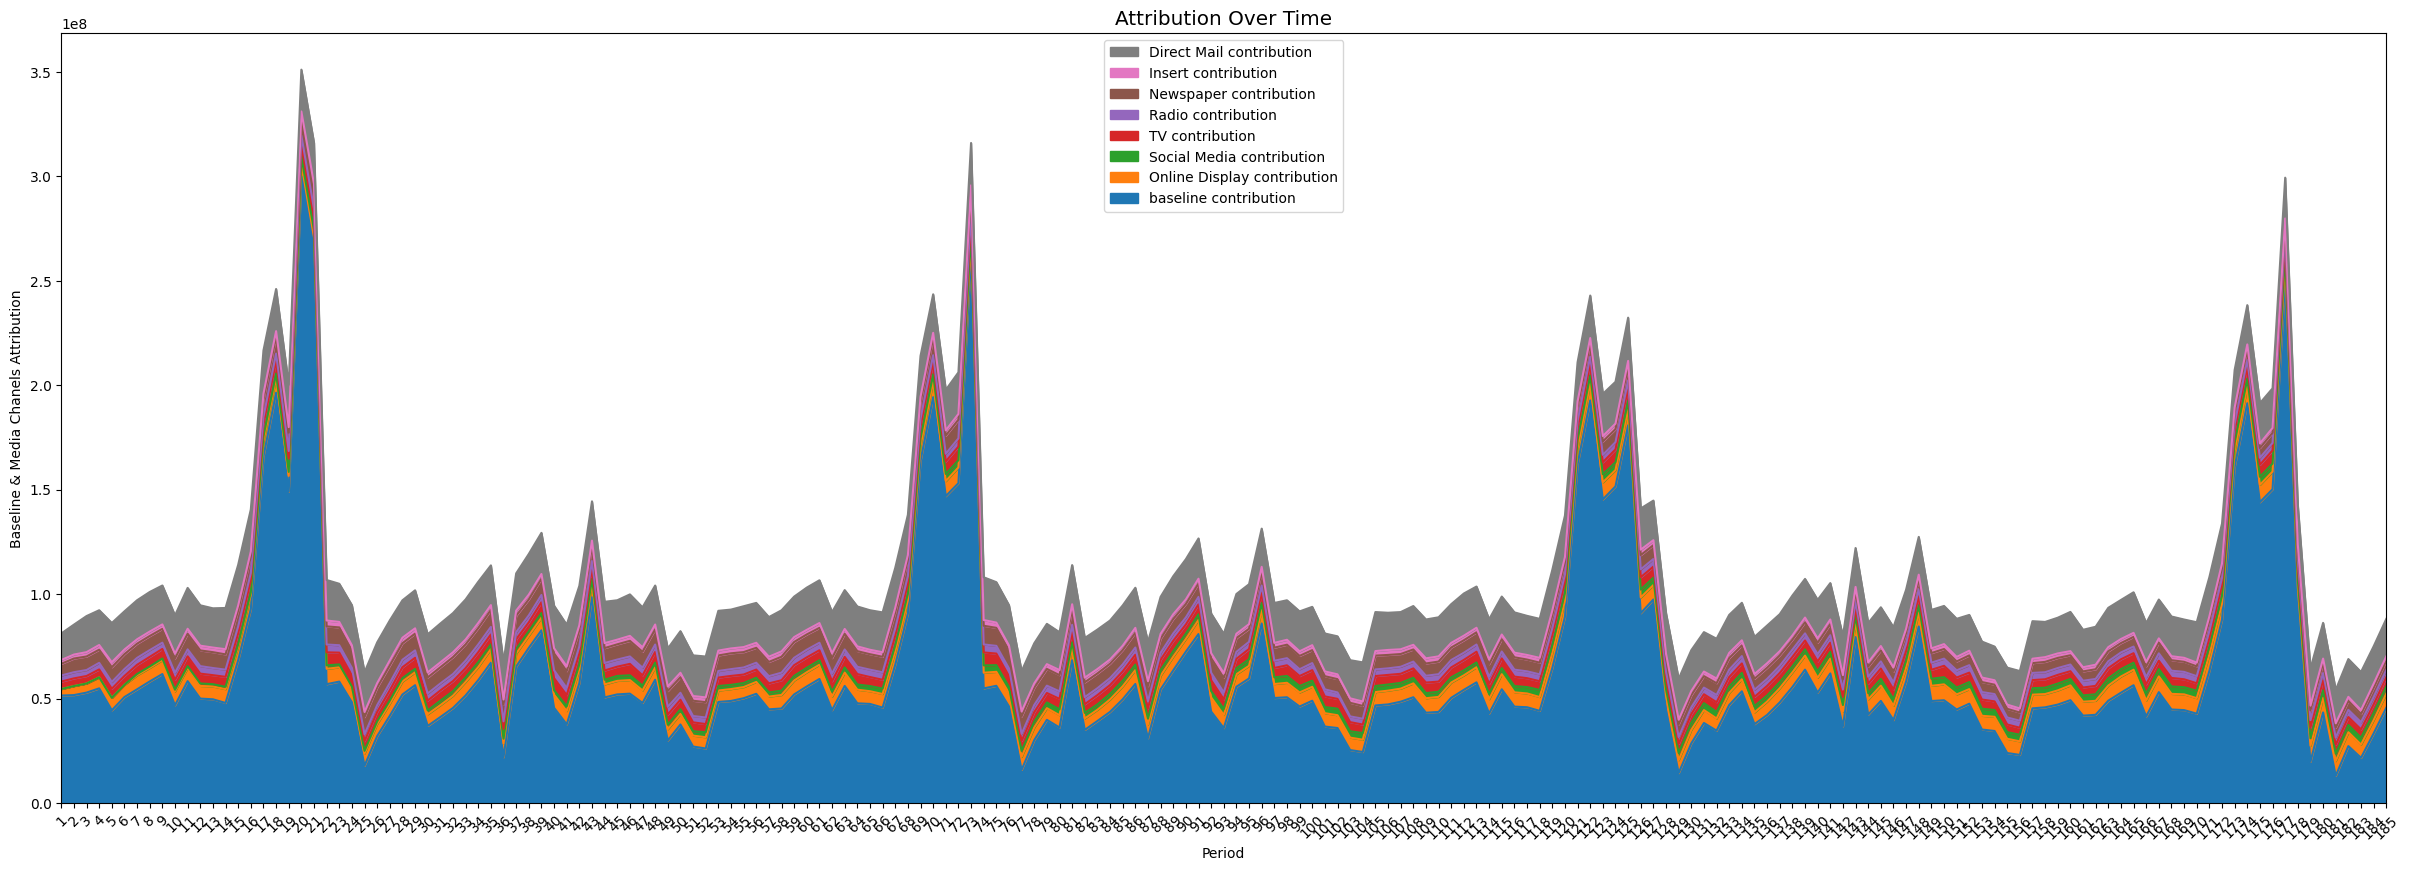

In [21]:

plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols
                                                )


We can quickly visualise the estimated media contributions with their respective credibility intervals



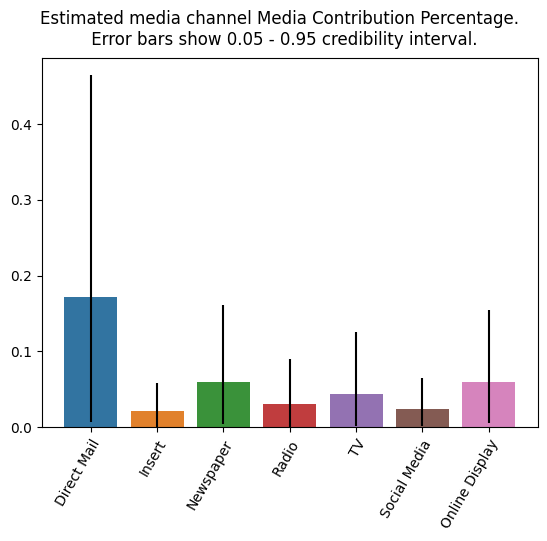

In [22]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=mdsp_cols)


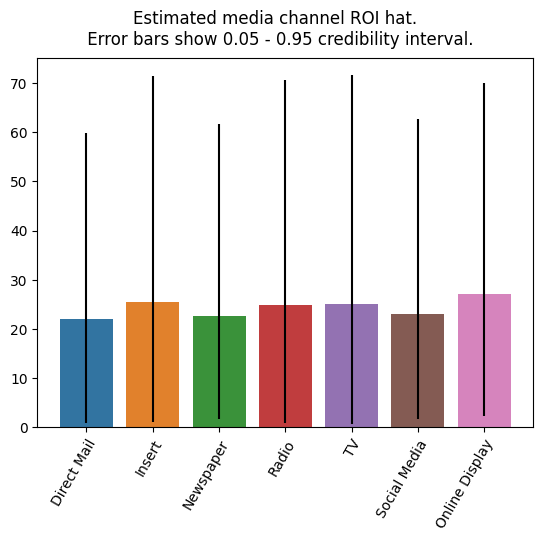

In [23]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat", channel_names=mdsp_cols)


This graph shows the estimated ROI of each media channel. Each bar represents how efficient the ROI of the media is. In this case, TV and Online Display are more efficient than other media.

Another vital question we can solve with MMMs is how each media channel behaves individually as we invest more in it.

For that we can plot the curve response of all media channels with the following function:

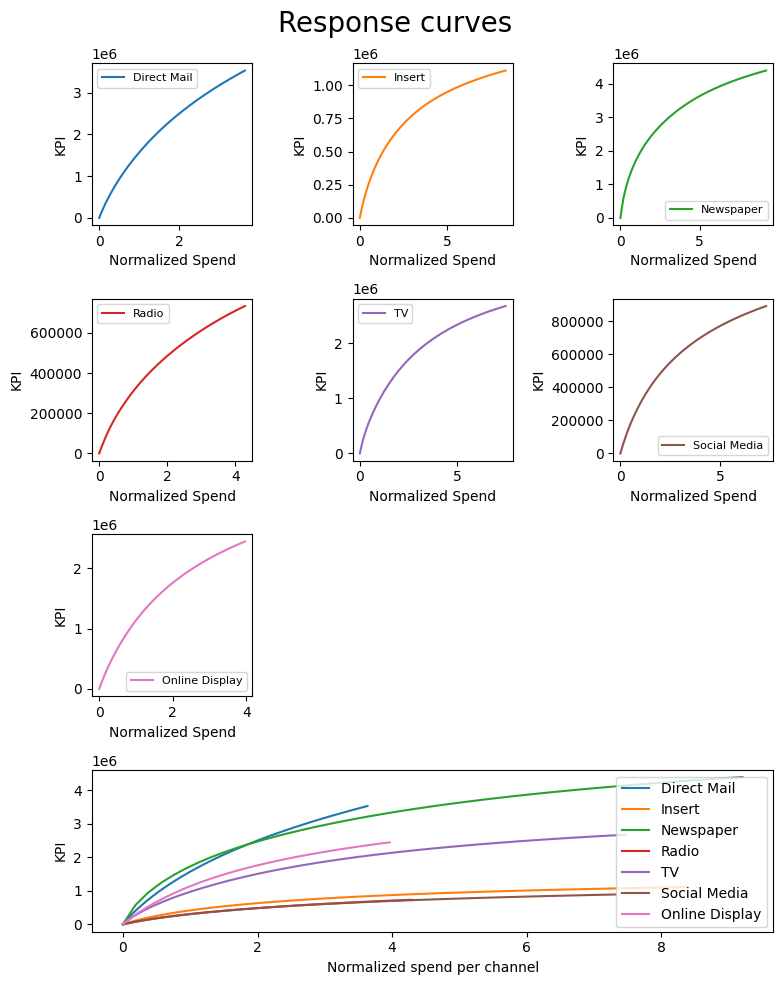

In [24]:
plot.plot_response_curves(media_mix_model=mmm, target_scaler=target_scaler, seed=SEED)


## Optimization
The optimization is meant to solve the budget allocation questions for you. First you need to provide for how long you want to optimize your budget (eg. 15 weeks in this case).

The optimization values will be bounded by +- 20% of the max and min historic values used for training. Which means the optimization won't recommend to completely change your strategy but how to make some budget re-allocation.

You can change that percentage with the following parameters: - bounds_lower_pct - bounds_upper_pct

Which can hold 1 value for all channels or 1 value per channel.

Prices are the average price you would expect for the media units of each channel. If your data is already a money unit (eg. $) your prices should be an array of 1s.



In [25]:
prices = jnp.ones(mmm.n_media_channels)


The budget is how much one would like to allocate throughtout the total of n_time_periods. Make sure this amount is inline with the historic spend or otherwise some conditions/bounds in the optimization might not be met.

In [26]:
n_time_periods = 20
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

In [27]:

# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2031826058.3286455
            Iterations: 64
            Function evaluations: 945
            Gradient evaluations: 63


If your media data is not in money unit (eg. impressions, clicks, GRPs, etc.), you would need to store the cost per values (eg. CPC) in the prices array and multiply it by solution.x to get the recommended budget allocation.

In [28]:

# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([12732954. ,  1915368.4,  5580175. ,  2230571.5,  4242602.5,
        2253508.5,  5053708. ], dtype=float32)

In [29]:
# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([15288896. ,  1625417.5,  5506312.5,  2342750.2,  3396159.2,
        1803910.1,  4045440.8], dtype=float32)

In [30]:

# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(Array(34008888., dtype=float32), Array(34008888., dtype=float32))

We can double check the budget constraint was met:



In [31]:
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(34008888., dtype=float32), Array(34008888., dtype=float32))

## We can plot the following:
1. Pre post optimization budget allocation comparison for each channel
2. Pre post optimization predicted target variable comparison

We can visualize the optimized media budget allocation. The graph shows the previous budget allocation and optimized budget allocation. In this case, direct mail and radio should be reduced, and other media should be increased.



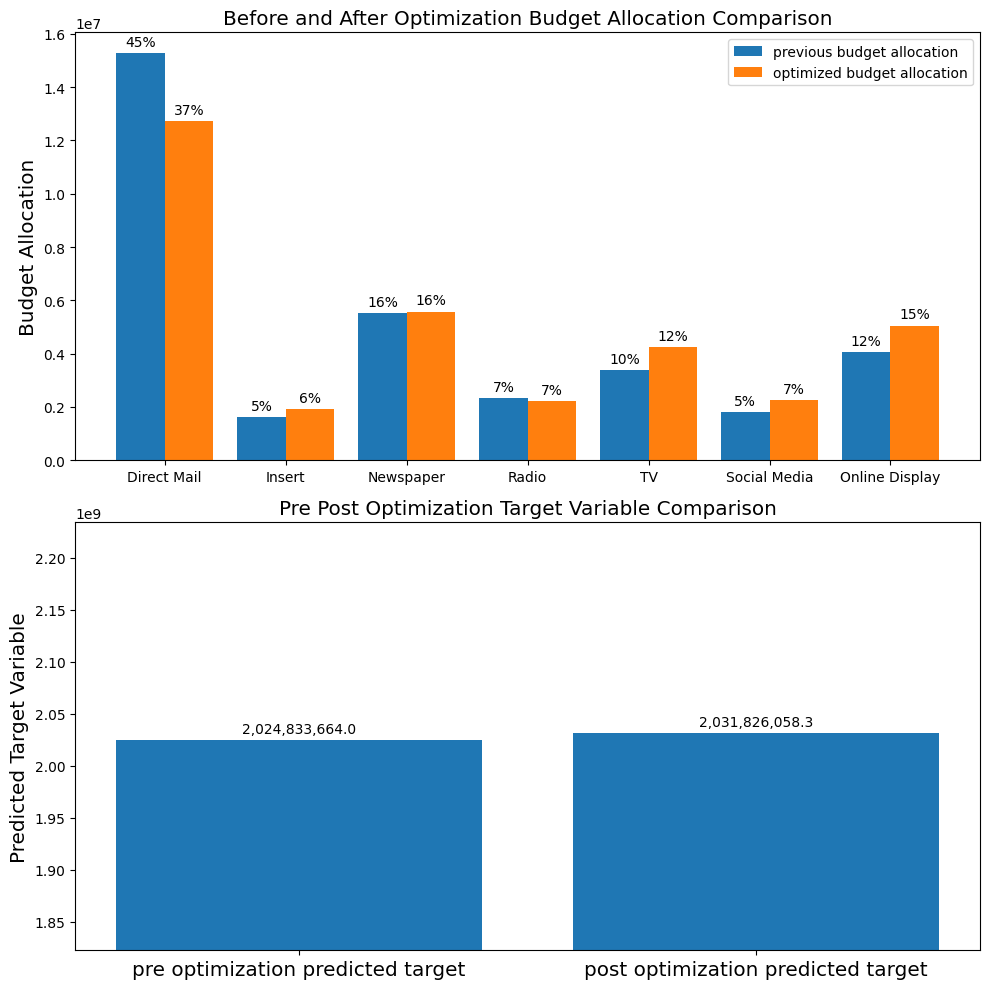

In [32]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation,
                                                previous_budget_allocation=previous_budget_allocation,
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols)

## Saving the model to disk


In [ ]:

# We can use the utilities for saving models to disk.
file_path = "media_mix_model.pkl"
utils.save_model(media_mix_model=mmm, file_path=file_path)

In [ ]:
# Once saved one can load the models.
loaded_mmm = utils.load_model(file_path=file_path)
loaded_mmm.trace["coef_media"].shape # Example of accessing any of the model values.

## How can you improve the model’s accuracy?
A tailor-made model is needed for better insights and actions because there is no "One size fits all" model, as every business is in a different situation.

Then, how do we improve model accuracy for better insights and actions?

**Better Data :** You need to choose the control variables that affect your sales based on your business. Generally speaking, sales fluctuate according to Promotions, Price Changes, and discounts. Out-of-stock information also has a significant impact on sales. Google researchers identified that search volume for relevant queries can be used in MMM to control the impact of paid search ads appropriately.

If you spend a lot on a specific media channel, it is better to break down the media channel into more specific groups.

**Better model:** The next recommendation is to improve the modeling. Of course, hyperparameter tuning is important. In addition to that, trying the Geo-level hierarchical approach is a good way to get better accuracy.

**Better experiment:** The third recommendation is to work with your marketing team and do actual experiments, known as a Lift test. As previously mentioned, it is unrealistic to do randomized experiments in all media. However, experimentation at key points is useful to get the ground truth and improve the model. Meta recently released the Geo Lift, which is an OSS solution that can be useful for geo-based experimentation.

![image.png](https://rb.gy/ltku9g)

## Conclusion
Let’s summarize some key takeaways.

MMM are statistical models which help in quantifying the impact of several marketing inputs on sales.

In advertising, saturation and Ad Stock are the key principles. They can be modeled using the transformation function.

If you are familiar with Python, LightweightMMM is a good first step.

For better insights and actions, keep trying better data, making better models, and doing better experiments.

Reference
- Jin, Y., Wang, Y., Sun, Y., Chan, D., & Koehler, J. (2017). Bayesian Methods for Media Mix Modeling with Carryover and Shape Effects. Google Inc.
- Chan, D., & Perry, M. (2017). Challenges and Opportunities in Media Mix Modeling.
- LightweightMMM : https://github.com/google/lightweight_mmm
- Robyn : https://github.com/facebookexperimental/Robyn
- mmm_stan : https://github.com/sibylhe/mmm_stan
